In [16]:
import tweepy                  
from textblob import TextBlob  
from wordcloud import WordCloud,STOPWORDS 
import pandas as pds             
import numpy as npy              
import re  
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from collections import Counter
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
from google.colab import files
uploaded=files.upload()

Saving Tweets.xlsx to Tweets (3).xlsx


In [4]:
#read contents of the excel
excel_data = pds.read_excel('Tweets.xlsx')

In [5]:
data = pds.DataFrame(excel_data, columns=['Date','tweet'])

In [6]:
arrwords=[]
for name in data['tweet'].unique():
    wordd=str(name).split()
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in wordd]
    arrwords+=stripped
  
    print(stripped[:100])

Streaming output truncated to the last 5000 lines.
['My', 'heart', 'is', 'bleeding', 'why', 'this', '', 'LuoLivesMatter', 'http', 'fbme9g38ehjgu']
['LuoLivesMatter', 'FredMatiangi', 'should', 'stop', 'his', 'orders', 'No', 'one', 'is', 'immortal']
['luolivesmatter', 'for', 'how', 'how', 'shall', 'they', 'kill', 'us', 'it', 'is', 'high', 'time', 'we', 'secede']
['Too', 'much', 'hatred', 'out', 'here', 'RailaInLondon', 'OppositionDemos', 'luolivesmatter']
['Luolivesmatter', '', 'Just', 'like', 'Pokots', 'Turkanas', 'they', 'need', 'to', 'arm', 'themselves']
['Maraga', 'amekaranga', 'vifaranga', 'vilivyo', 'SupremeCourtDecides', 'LuoLivesmatter']
['LuoLivesMatter', 'Everyone', 'sLifeMatter', 'Keep', 'calm', 'as', 'SupremeCourtDecides']
['Thank', 'you', 'Prof', 'AnyangNyongo', 'for', 'supporting', 'the', 'campaign', 'LuoLivesmatter']
['Going', 'to', 'finich', 'Railas', 'people', 'LuoLivesMatter', 'pictwittercom51FBxt66Zn']
['LuoLivesmatter', 'untill', 'when', 'you', 'realize', 'throwing', 

In [7]:
#number of unique words from arrwords[]
from collections import Counter
num_unique_values = len(Counter(arrwords).keys())
print(num_unique_values)

37028


In [8]:
#Tokenizing the word array and their parts of speech tags
arrtoken=[]
for word in arrwords:
  tokenizer=word_tokenize(word)
  arrtoken+=tokenizer
nltk.pos_tag(arrtoken)


[('ComedyCentralKE', 'NNP'),
 ('These', 'DT'),
 ('words', 'NNS'),
 ('can', 'MD'),
 ('kill', 'VB'),
 ('a', 'DT'),
 ('Luhya', 'NNP'),
 ('Wacha', 'NNP'),
 ('Ugali', 'NNP'),
 ('ipoe', 'VBZ'),
 ('The', 'DT'),
 ('little', 'JJ'),
 ('luhya', 'NN'),
 ('that', 'WDT'),
 ('remains', 'VBZ'),
 ('in', 'IN'),
 ('me', 'PRP'),
 ('always', 'RB'),
 ('Sitokingi', 'NNP'),
 ('kills', 'VBZ'),
 ('me', 'PRP'),
 ('cheernatwildcat', 'NN'),
 ('kill', 'VB'),
 ('it', 'PRP'),
 ('at', 'IN'),
 ('battle', 'NN'),
 ('this', 'DT'),
 ('weekend', 'NN'),
 ('wildcat', 'NN'),
 ('luhya', 'JJ'),
 ('HomeboyzRadio', 'NNP'),
 ('HBR', 'NNP'),
 ('luv', 'VBZ'),
 ('dat', 'JJ'),
 ('luhya', 'NN'),
 ('hit', 'VBD'),
 ('luhyas', 'JJ'),
 ('always', 'RB'),
 ('kill', 'VBP'),
 ('awoooh', 'JJ'),
 ('HangOutFriday', 'NNP'),
 ('hahaha', 'VBD'),
 ('ball', 'DT'),
 ('ya', 'NN'),
 ('terby', 'RB'),
 ('derby', 'JJ'),
 ('Luhyas', 'NNP'),
 ('will', 'MD'),
 ('kill', 'VB'),
 ('me', 'PRP'),
 ('Luos', 'NNP'),
 ('donâ€™t', 'NN'),
 ('kill', 'NN'),
 ('blood', 'NN'

In [9]:
#10 most frequently used tokens
count_tokens=Counter(arrtoken)
print(count_tokens.most_common(10)) 


[('are', 5366), ('the', 4415), ('to', 3187), ('is', 2669), ('a', 2275), ('you', 2208), ('and', 2011), ('of', 1997), ('in', 1900), ('I', 1671)]


In [10]:
#removing stopwords
stop_words = set(stopwords.words('english'))
filt_words = []

for w in arrtoken:
    if w not in stop_words:
        filt_words.append(w)

In [11]:
#10 most frequently filtered used tokens after getting rid of stopwords
count_filt_tokens=Counter(filt_words)
print(count_filt_tokens.most_common(10))

[('I', 1671), ('Nyakundi', 1261), ('https', 1155), ('NoReformsNoElections', 1109), ('â€¦', 1106), ('Kikuyus', 810), ('Luos', 740), ('RIPMsando', 737), ('kikuyus', 728), ('na', 710)]


In [12]:
#removing non-alphanumeric characters
appword=[]
def alph(n):
  arrone=[]
  arrtwo=[]
  for l in n:
       s = re.sub(r'[^a-zA-Z0-9]', '', l)
       arrone+=s
  arrtwo=''.join(map(str, arrone))
  return arrtwo
for string_value in count_filt_tokens:
  wordy=alph(string_value)
  appword.append(wordy)
print(appword)
print(len(appword))



['ComedyCentralKE', 'These', 'words', 'kill', 'Luhya', 'Wacha', 'Ugali', 'ipoe', 'The', 'little', 'luhya', 'remains', 'always', 'Sitokingi', 'kills', 'cheernatwildcat', 'battle', 'weekend', 'wildcat', 'HomeboyzRadio', 'HBR', 'luv', 'dat', 'hit', 'luhyas', 'awoooh', 'HangOutFriday', 'hahaha', 'ball', 'ya', 'terby', 'derby', 'Luhyas', 'Luos', 'dont', 'blood', 'thirsty', 'killers', 'two', 'tribes', 'Same', 'police', 'luos', 'bondo', 'shot', 'grannies', 'migori', 'But', 'theres', 'provision', 'innocent', 'unarmed', 'gvnt', 'us', 'determined', 'young', 'old', 'Issfine', 'Today', 'eventsSCOK', 'Maraga', 'Adventist', 'uphold', 'Uhurus', 'citizentvkenya', 'Diana', 'Akoth', 'lol', 'Slimpossible7', 'Moses', 'kurias', 'main', 'aim', 'pictwittercomSsKy2Zejdb', 'You', 'give', 'orders', 'enough', 'get', 'promotedIts', 'alright', 'How', 'To', 'Kill', 'Alshabaab', '1', 'Convert', '2', 'Ujaluo', 'itawauwa', 'alshabaabs', '1Convert', '2Ujaluo', 'itawaua', 'HOW', 'TO', 'KILL', 'ALSHABAAB', '1convert', '2

In [13]:
#removing empty spaces and rows.
while(' ' in appword) :
    appword.remove(' ')

In [14]:
#tokenizing and tagging the cleaned data
tagwords=[]
for x in appword:
  token = nltk.word_tokenize(x)
  tagwords+=token
nltk.pos_tag(tagwords)

[('ComedyCentralKE', 'NNP'),
 ('These', 'DT'),
 ('words', 'NNS'),
 ('kill', 'VBP'),
 ('Luhya', 'NNP'),
 ('Wacha', 'NNP'),
 ('Ugali', 'NNP'),
 ('ipoe', 'VBZ'),
 ('The', 'DT'),
 ('little', 'JJ'),
 ('luhya', 'NN'),
 ('remains', 'VBZ'),
 ('always', 'RB'),
 ('Sitokingi', 'NNP'),
 ('kills', 'VBZ'),
 ('cheernatwildcat', 'JJ'),
 ('battle', 'NN'),
 ('weekend', 'NN'),
 ('wildcat', 'NN'),
 ('HomeboyzRadio', 'NNP'),
 ('HBR', 'NNP'),
 ('luv', 'VBZ'),
 ('dat', 'NN'),
 ('hit', 'VBD'),
 ('luhyas', 'JJ'),
 ('awoooh', 'NN'),
 ('HangOutFriday', 'NNP'),
 ('hahaha', 'VBZ'),
 ('ball', 'NN'),
 ('ya', 'NN'),
 ('terby', 'JJ'),
 ('derby', 'JJ'),
 ('Luhyas', 'NNP'),
 ('Luos', 'NNP'),
 ('dont', 'NN'),
 ('blood', 'NN'),
 ('thirsty', 'JJ'),
 ('killers', 'NNS'),
 ('two', 'CD'),
 ('tribes', 'NNS'),
 ('Same', 'JJ'),
 ('police', 'NN'),
 ('luos', 'VBD'),
 ('bondo', 'NN'),
 ('shot', 'NN'),
 ('grannies', 'NNS'),
 ('migori', 'VBP'),
 ('But', 'CC'),
 ('theres', 'VBZ'),
 ('provision', 'NN'),
 ('innocent', 'NN'),
 ('unarmed',

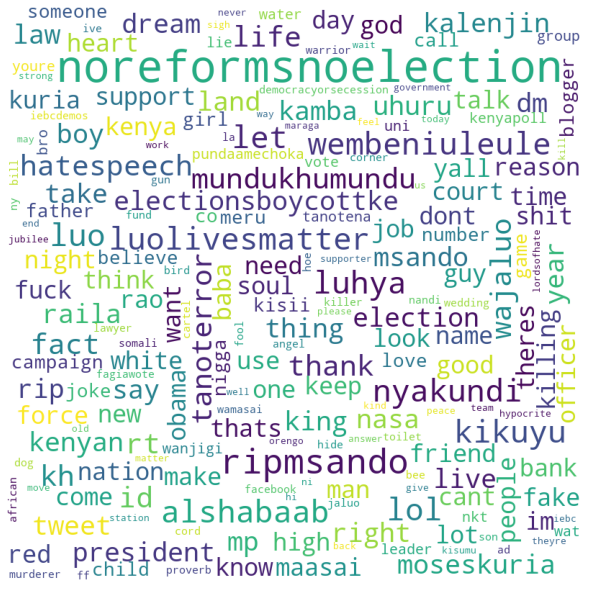

In [17]:
#creating a wordcloud 
comment_words=''
stopwords = set(STOPWORDS)
for i in range(len(appword)):
    appword[i] = appword[i].lower()
     
    comment_words += " "+ appword[i]+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plotting the wordcloud image                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()